In [ ]:
library(tidyverse)
library(readxl)
library(rasilabRtemplates)
library(plotrix)
library(ggrepel)

In [2]:
ct_data <- read_excel("../rawdata/2022-09-01_kchen_exp66_r2.xls", sheet = "Results", skip=47) %>%
  print()

# A tibble: 34 × 34
    Well Well Positi…¹ Omit  Sampl…² Targe…³ Task  Repor…⁴ Quenc…⁵ CT    Ct Me…⁶
   <dbl> <chr>         <lgl> <chr>   <chr>   <chr> <chr>   <chr>   <chr>   <dbl>
 1     1 A1            FALSE Sample… Target… UNKN… SYBR    None    Unde…    7.56
 2     2 A2            FALSE Sample… Target… UNKN… SYBR    None    Unde…    7.56
 3     3 A3            FALSE Sample… Target… UNKN… SYBR    None    4.10…    7.56
 4     4 A4            FALSE Sample… Target… UNKN… SYBR    None    4.84…    7.56
 5     5 A5            FALSE Sample… Target… UNKN… SYBR    None    Unde…    7.56
 6     6 A6            FALSE Sample… Target… UNKN… SYBR    None    Unde…    7.56
 7     7 A7            FALSE Sample… Target… UNKN… SYBR    None    4.60…    7.56
 8     8 A8            FALSE Sample… Target… UNKN… SYBR    None    5.24…    7.56
 9    13 B1            FALSE Sample… Target… UNKN… SYBR    None    Unde…    7.56
10    14 B2            FALSE Sample… Target… UNKN… SYBR    None    Unde…    7.56
# … with

In [4]:
annotations <- read_csv("../annotations/sample_annotations_r2.csv") %>%
    dplyr::rename(`Well Position` = Well) %>%
    mutate(dil = as.numeric(str_sub(dil, 1,1)) / as.numeric(str_extract(dil, "[^:]+$")))

Rows: 34 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): RT, dil, Well
dbl (1): Tube

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [10]:
qpcr_data <- ct_data %>%
    left_join(annotations, by='Well Position') %>%
    select(Tube, RT, "Well Position", CT, dil)

In [11]:
amp_data <- read_excel("../rawdata/2022-09-01_kchen_exp66_r2.xls", sheet = "Amplification Data", skip=47) %>%
  print()

# A tibble: 2,400 × 6
    Well `Well Position` Cycle `Target Name`      Rn `Delta Rn`
   <dbl> <chr>           <dbl> <chr>           <dbl>      <dbl>
 1     1 A1                  1 Target 1       76695.   -206629.
 2     1 A1                  2 Target 1       98776.   -199454.
 3     1 A1                  3 Target 1      164555    -148581.
 4     1 A1                  4 Target 1      236692.    -91351.
 5     1 A1                  5 Target 1      301586.    -41362.
 6     1 A1                  6 Target 1      354529.     -3325.
 7     1 A1                  7 Target 1      396986.     24226.
 8     1 A1                  8 Target 1      430369.     42703.
 9     1 A1                  9 Target 1      456910.     54338.
10     1 A1                 10 Target 1      477623.     60146.
# … with 2,390 more rows
# ℹ Use `print(n = ...)` to see more rows


In [13]:
plot_data <- amp_data %>%
    drop_na() %>%
    left_join(annotations, by="Well Position") %>%
    select(Tube, RT, "Well Position", Cycle, "Delta Rn", dil) %>%
    mutate(order = fct_reorder(as.factor(dil), desc(dil))) %>%
    left_join(select(qpcr_data, c(`Well Position`,CT)), by="Well Position") %>%
    mutate(CT = round(as.numeric(CT), 0))

Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


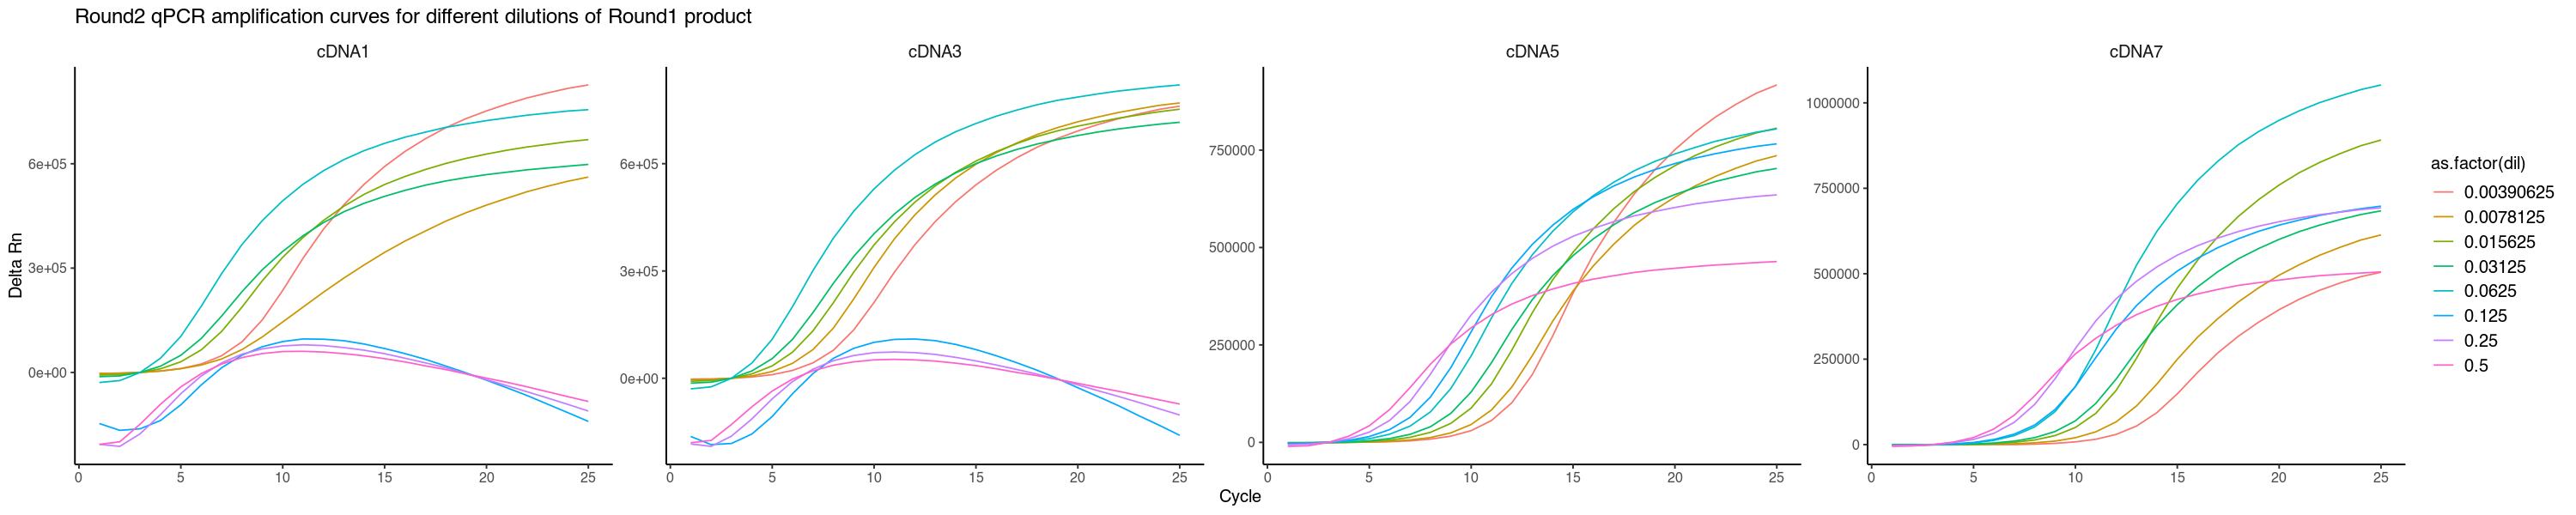

In [24]:
options(repr.plot.width=25, repr.plot.height=5)

plot_data %>%
    filter(RT != 'H2O') %>%
    ggplot() +
    aes(x=Cycle, y=`Delta Rn`, color=as.factor(dil)) +
    facet_wrap(~RT, scales='free', ncol=4) +
    geom_line() +
    labs(title="Round2 qPCR amplification curves for different dilutions of Round1 product")

In [26]:
ggsave("../figures/round2_qpcr_curves.jpg", width=25, height=5)